In [648]:
import pandas as pd
import matplotlib.pyplot as plt
import tda, config
import mplfinance as mplf
from datetime import datetime
import numpy as np
import math
import matplotlib.dates as mdates
client = tda.auth.client_from_token_file('kiran.json', config.TD_CLIENT_ID)
pd.options.mode.chained_assignment = None #default = warn

In [699]:
df = pd.DataFrame(client.get_price_history_every_minute('JPM').json()['candles'])
window_val_1, window_val_2 = 60,1
percentile = .1
candles = df[-window_val_1:min(-window_val_2,-1)]
midpoints = [(row[1].high+row[1].low)/2 for row in candles.iterrows()]
candles['midpoint'] = midpoints
candle_num = [x for x in range(1,candles.shape[0]+1)]
candles['candle_num'] = candle_num
highs_a, highs_b = np.polyfit(candles.candle_num,candles.high,1)
high_variance = [(row[1].high-(row[1].candle_num*highs_a+highs_b))/row[1].midpoint for row in candles.iterrows()]
candles['high_variance'] = high_variance
lows_a, lows_b = np.polyfit(candles.candle_num,candles.low,1)
low_variance = [((row[1].candle_num*lows_a+lows_b)-row[1].low)/row[1].midpoint for row in candles.iterrows()]
candles['low_variance'] = low_variance

In [700]:
datetime_col = [datetime.fromtimestamp(row[1].datetime/1000) for row in candles.iterrows()]
candles.index = datetime_col
n_largest = math.floor(percentile*candles.shape[0])
high_list = candles.nlargest(n_largest,'high_variance')
ha,hb = np.polyfit(high_list.candle_num,high_list.high,1)
high_list = high_list.append(candles.iloc[-1])
high_list = high_list.append(candles.iloc[0])
high_list = high_list.sort_index()
low_list = candles.nlargest(n_largest,'low_variance')
la,lb = np.polyfit(low_list.candle_num,low_list.low,1)
low_list = low_list.append(candles.iloc[-1])
low_list = low_list.append(candles.iloc[0])
low_list = low_list.sort_index()
ma,mb = np.polyfit(candles.candle_num,candles.midpoint,1)

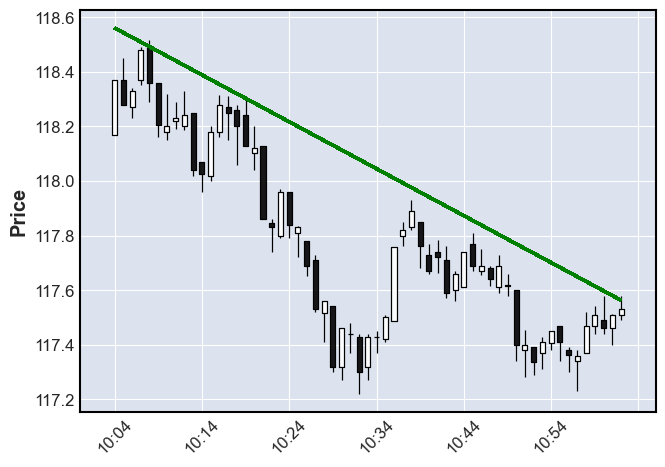

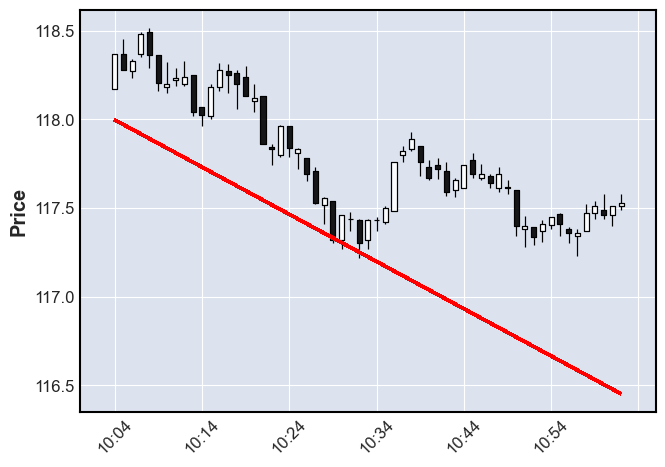

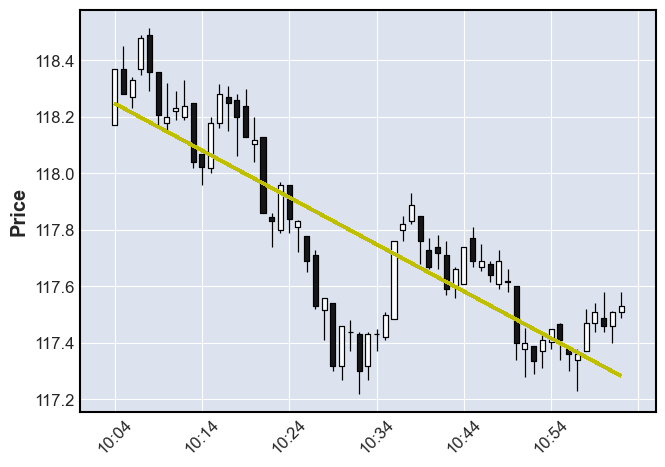

In [701]:
high_line =[(row[0].__str__(),ha*(row[1].candle_num)+hb) for row in candles.iterrows()]
low_line =[(row[0].__str__(),la*(row[1].candle_num)+lb) for row in candles.iterrows()]
mid_line =[(row[0].__str__(),ma*(row[1].candle_num)+mb) for row in candles.iterrows()]
mplf.plot(candles, type='candle',alines = dict(alines = high_line,colors = 'g'))
mplf.plot(candles, type='candle',alines = dict(alines = low_line,colors = 'r'))
mplf.plot(candles, type='candle',alines = dict(alines = mid_line,colors = 'y'))

In [690]:
print(ha,la)

-0.013041575492342184 -0.003571428571432243
